<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

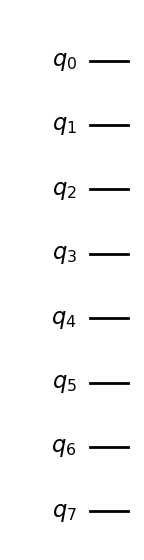

In [ ]:
qc = QuantumCircuit(8)

# Consider 4 boxes, where each box can take any value from 1 to 4. Hence each box can take 2 qubits to denote al the way from 00 to 11
# We have 8 classical bits that measure the 8 input qubits.
qc.draw("mpl")

$$
\text{radians} = \text{degrees} \times \frac{\pi}{180}
$$

So specifically:

* $0^\circ = 0 \, \text{rad}$
* $90^\circ = \frac{\pi}{2} \, \text{rad} \approx 1.5708$
* $180^\circ = \pi \, \text{rad} \approx 3.1416$

👉 Therefore, the range **0° to 180°** corresponds to:

$$
0 \, \text{rad} \; \leq \; \theta \; \leq \; \pi \, \text{rad}
$$


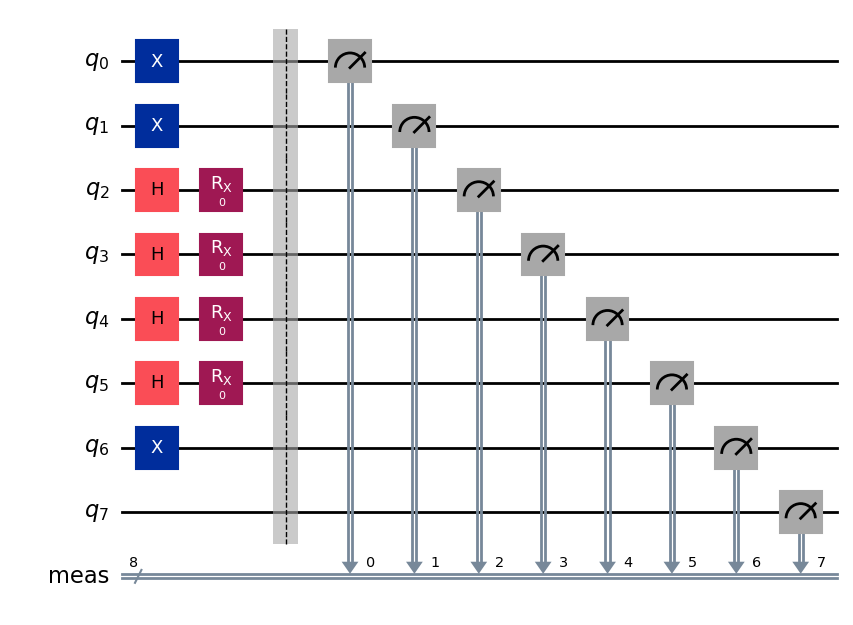

In [ ]:
# box(0,0) = 2, box(1,1) = 4. Thus find the other two values such that they dont repeat the already given values
# 1 = 2, 2 = ?, 3 = ?, 4 = 4
# (q7,q6) = 1, (q1,q0) = 4
qc = QuantumCircuit(8)
theta=[0,0,0,0]

qc.x([6,1,0])
qc.h([2,3,4,5])
qc.rx(theta[0],2)
qc.rx(theta[1],3)
qc.rx(theta[2],4)
qc.rx(theta[3],5)


qc.measure_all()
qc.draw("mpl")


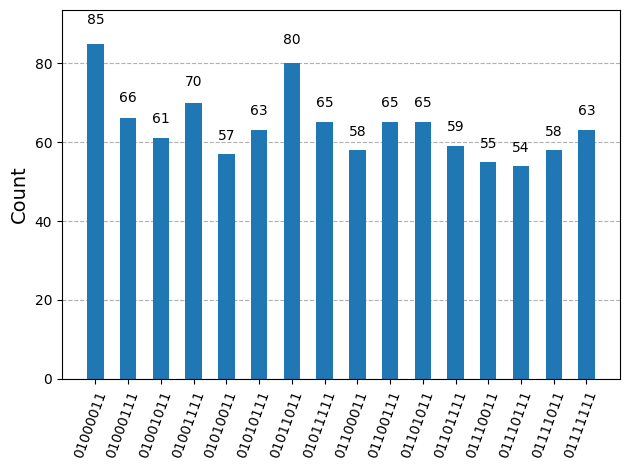

In [ ]:
sim = AerSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts()
output = list(counts.keys())
plot_histogram(counts)

Iteration 0: theta=[0, 0, 0, 0], output=01010011
Iteration 1: theta=[0.12275724081024159, 0.11491358844634342, 0.10315661563168554, 0.15596980681047123], output=01100111
Iteration 2: theta=[0.3516689196168281, 0.07198958978919567, 0.3319714492657336, 6.256816438604613], output=01110011
Iteration 3: theta=[0.18994411715464687, 0.06714539285176468, 0.3359047140145654, 0.25869531941050106], output=01011111
Iteration 4: theta=[6.210211409177006, 0.22083467877465562, 0.2575501669826447, 0.3532708809416373], output=01111011
Iteration 5: theta=[6.122045524815412, 0.48942386131723903, 0.4854630211036117, 0.24567706015954302], output=01100011
✅ Target state 01100011 found at iteration 5


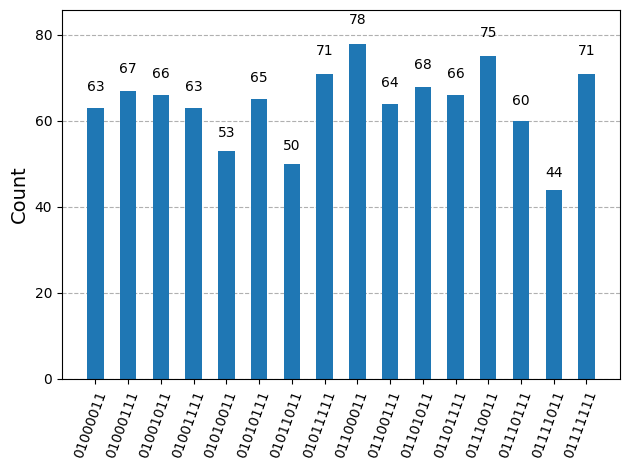

In [ ]:
import random
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# initialize simulator
sim = AerSimulator()

# target outputs
targets = {"01100011", "01001011"}

# start with some random theta values
# theta = [random.uniform(0, 2*np.pi) for _ in range(4)]
theta = [0,0,0,0]

def build_circuit(theta):
    qc = QuantumCircuit(8)
    qc.x([6,1,0])
    qc.h([2,3,4,5])
    qc.rx(theta[0],2)
    qc.rx(theta[1],3)
    qc.rx(theta[2],4)
    qc.rx(theta[3],5)
    qc.measure_all()
    return qc

found = False
iteration = 0

while not found and iteration < 100:
    qc = build_circuit(theta)
    job = sim.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts()
    output = max(counts, key=counts.get)  # most probable outcome
    print(f"Iteration {iteration}: theta={theta}, output={output}")

    if output in targets:
        print(f"✅ Target state {output} found at iteration {iteration}")
        found = True
        display(plot_histogram(counts))
        break

    # --- update rule for theta ---
    # tweak each theta randomly (like a blind search / gradient-free)
    theta = [t + random.uniform(-0.3, 0.3) for t in theta]
    # keep theta in [0, 2π]
    theta = [t % (2*np.pi) for t in theta]

    iteration += 1


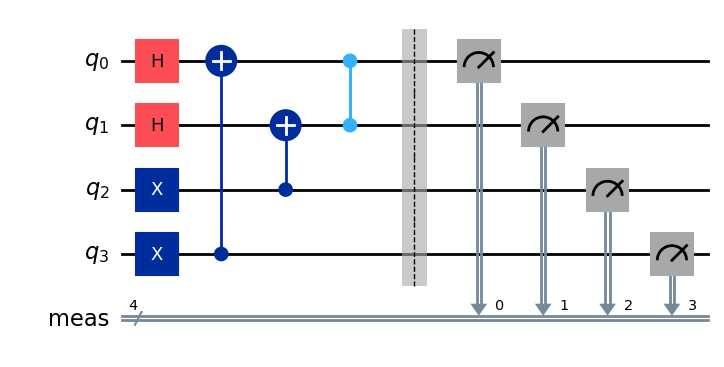

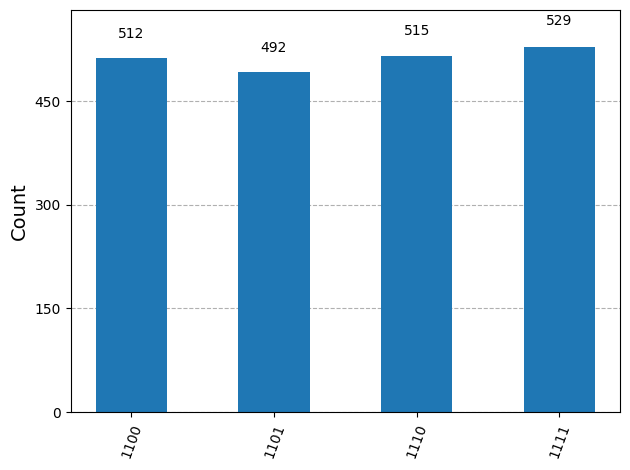

In [ ]:
circuit = QuantumCircuit(4)
circuit.x([2,3])
circuit.h([0,1])

# implement the logic here
circuit.cx(3,0)
circuit.cx(2,1)
circuit.cz(1,0)


# logic ends here

circuit.measure_all()
display(circuit.draw("mpl"))
test = AerSimulator()
job = test.run(circuit, shots=2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
s = [[0,1,2,3] ,[4,5,6,7],[8,9,10,11],[12,13,14,15]]
exception = [5,4,7,6,1,0,3,2,13,12,15,14,9,8,11,10]
h = []

d = []
f = 0
for i in range(16):
    temp = []
    k = i
    while(k-4>=0):
        k = k-4
        temp.append(k)
    k = i
    while(k+4<=15):
        k = k+4
        temp.append(k)
    d.append(temp)
    for j in s:
        if i in j:
            for l in j:
                if i!=l:
                    temp.append(l)


for i in range(len(d)):
    d[i].append(exception[i])

for i in range(len(d)):
    for j in d[i]:
        h.append([i,2*j])
        h.append([i+1,2*j+1])
        h.append([i,i+1,2*j,2*j+1])

H = ["" for i in range(len(h))]
for i in range(len(H)):
    s = ""
    k = 0
    for j in range(32):
        if k<len(h[i]):
            if h[i][k] == j:
                s = s + "Z"
                k = k + 1
            else:
                s = s + "I"
        else:
            s = s+"I"
    H[i] = s

coeff = [1 for i in range(len(H))]
known = {0:0,1:1,10:0,11:0,14:0,15:1,20:1,21:0,30:1,31:1}

change = []

for i in range(len(H)):
    for j in known:
        if H[i][j] == "Z":
            change.append(i)
            break

for i in change:
    count = 0
    for j in range(len(H[i])):
        if H[i][j] == "Z" and j in known:
            if known[j] == 1:
                count += 1
    if count % 2 != 0:
        coeff[i] = -1

for i in range(len(change)):
    s = H[change[i]]
    f = ""
    for j in range(len(s)):
        if j in [0,1,10,11,14,15,20,21,30,31] and s[j] == "Z":
            f += "I"
        else:
            f += s[j]
    H[change[i]] = f


print("Hamiltonian : ", H )
print("Coeff : ", coeff)
print(len(H), len(coeff))

Hamiltonian :  ['IIIIIIIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIZZIIIIIIIIIIII', 'IIIIIIIIIII

In [ ]:
from qiskit.quantum_info import SparsePauliOp
cost_hamiltonian = SparsePauliOp(H,coeff)
cost_hamiltonian

SparsePauliOp(['IIIIIIIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIZZIIIIIIIIIIII', 'IIIIIIIIIIII

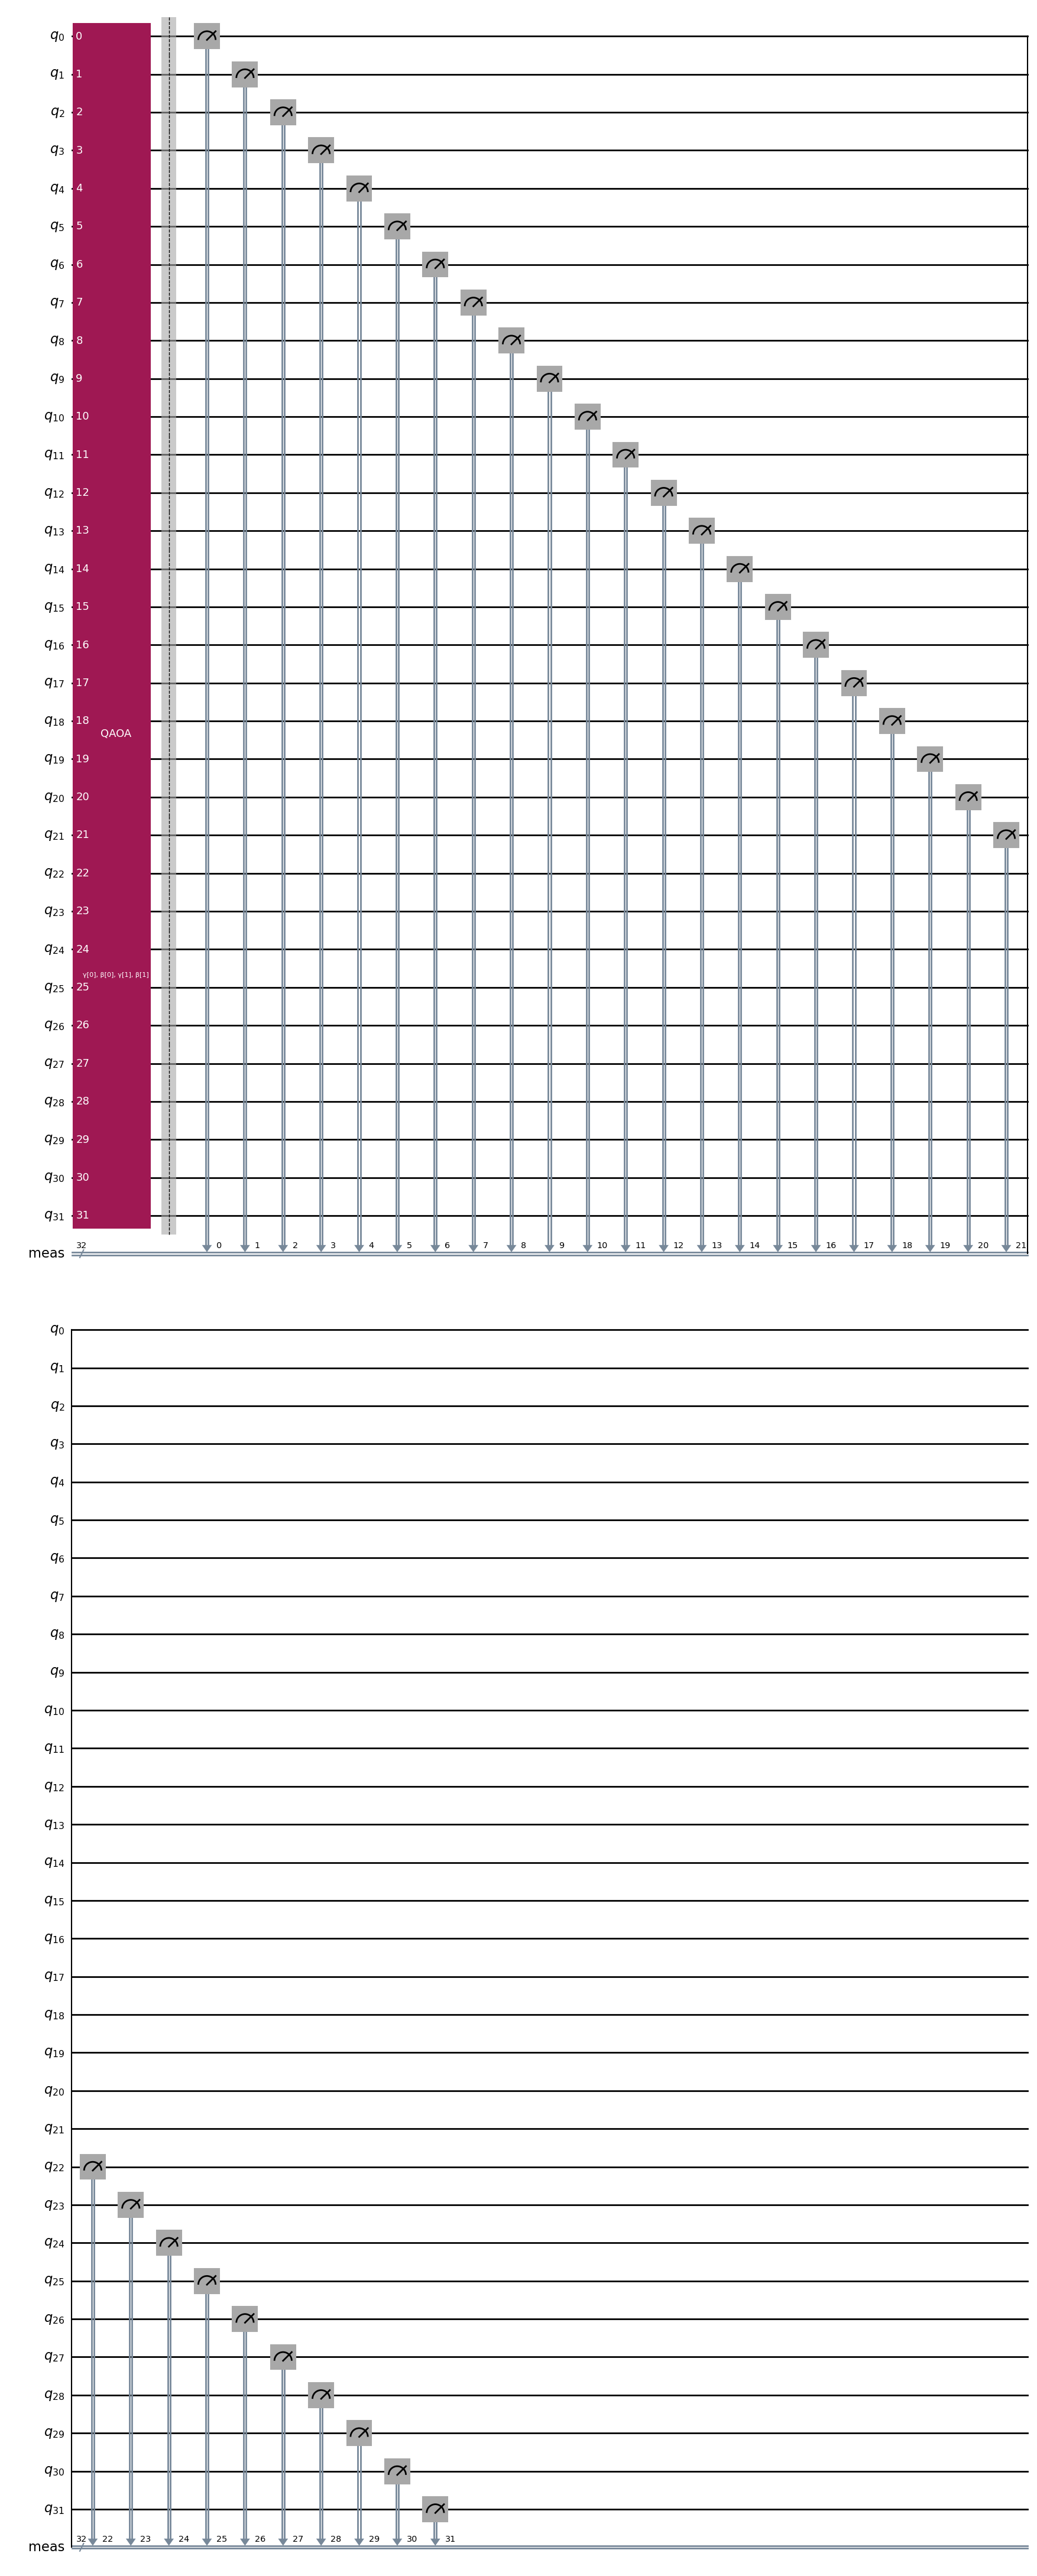

In [ ]:
from qiskit.circuit.library import QAOAAnsatz
qaoa_circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps = 2)
qaoa_circuit.measure_all()
qaoa_circuit.draw("mpl")

In [ ]:
# # QAOA + SciPy (COBYLA) + Aer (matrix_product_state)
# # Replace the qaoa_ansatz or cost_hamiltonian placeholders with your actual objects.

# import numpy as np
# from scipy.optimize import minimize
# from qiskit import QuantumCircuit, transpile
# from qiskit_aer import AerSimulator
# from qiskit.circuit.library import QAOAAnsatz
# from qiskit.quantum_info import SparsePauliOp

# qaoa_ansatz = qaoa_circuit

# # Parameters
# TOTAL_QUBITS = 32                       # final wrapper size
# INIT_X_QUBITS = [1, 15, 20, 30, 31]     # your initial X flips
# REPS = qaoa_ansatz.reps if hasattr(qaoa_ansatz, "reps") else 1
# N_QAOA = qaoa_ansatz.num_qubits

# # Build parameterized template: wrapper (32 qubits) with ansatz embedded on qubits [0..N_QAOA-1]
# wrapper = QuantumCircuit(TOTAL_QUBITS)
# wrapper.x(INIT_X_QUBITS)
# param_template = wrapper.compose(qaoa_ansatz, qubits=range(N_QAOA))
# # measure all to get bitstrings for counts (we measure after ansatz)
# param_template.measure_all()

# # Aer simulator using MPS method (matrix product state)
# sim = AerSimulator(method="matrix_product_state")

# # Helper: run bound circuit on Aer (transpile each bound circuit for sim)
# def run_on_aer(bound_circ: QuantumCircuit, shots: int = 2048):
#     tcirc = transpile(bound_circ, sim, optimization_level=3)
#     job = sim.run(tcirc, shots=shots)
#     result = job.result()
#     return result.get_counts()

# # Helper: compute expectation value <H> from full-circuit counts
# # Assumes cost_hamiltonian only contains Z / I terms (typical MaxCut). If X/Y present, basis-rotate first.
# def expectation_from_counts(counts: dict, shots: int, pauli_op: SparsePauliOp):
#     exp = 0.0
#     terms = pauli_op.to_list()  # list of (pauli_string, coeff)
#     for bitstr, cnt in counts.items():
#         prob = cnt / shots
#         value_bs = 0.0
#         for pstr, coeff in terms:
#             # pstr rightmost char -> qubit-0. bitstr leftmost -> q_{TOTAL_QUBITS-1}
#             eigen = 1.0
#             # reverse pstr so index 0 -> qubit-0
#             for q_index, pchar in enumerate(reversed(pstr)):
#                 if pchar == "I":
#                     continue
#                 if pchar == "Z":
#                     # locate measured bit for qubit q_index (in full 32-bit string)
#                     measured_bit = bitstr[len(bitstr) - 1 - q_index]  # '0' or '1'
#                     eigen *= (1.0 if measured_bit == "0" else -1.0)
#                 else:
#                     raise ValueError("expectation_from_counts supports only Z/I Pauli terms. Found: " + pchar)
#             value_bs += coeff * eigen
#         exp += prob * value_bs
#     return exp

# # Cost function used by SciPy (minimize)
# SHOTS_EVAL = 1
# def cost_function(params):
#     bound = param_template.assign_parameters(params)
#     counts = run_on_aer(bound, shots=SHOTS_EVAL)
#     expval = expectation_from_counts(counts, SHOTS_EVAL, cost_hamiltonian)
#     # QAOA commonly minimizes the expectation
#     return expval

# # Initial guess
# num_params = qaoa_ansatz.num_parameters
# init = np.random.uniform(0, 2*np.pi, size=num_params)

# # Optimize with COBYLA via SciPy
# print("Starting COBYLA optimization (Aer MPS) ... (this may take a while)")
# def callback_fn(xk):
#     # xk = current parameter values
#     val = cost_function(xk)
#     print(f"Iteration params: {xk}, cost: {val}")

# # Run COBYLA optimizer
# opt_result = minimize(
#     cost_function,
#     init,
#     method="COBYLA",
#     callback=callback_fn,
#     options={"maxiter": 200, "tol": 0.9}
# )

# print("Done. Success:", opt_result.success, "| message:", opt_result.message)
# print("Optimal params (len={}):".format(len(opt_result.x)), opt_result.x)
# print("Estimated optimal energy:", opt_result.fun)

# # Final evaluation at optimal params (more shots for statistics)
# SHOTS_FINAL = 1
# bound_opt = param_template.bind_parameters(opt_result.x)
# final_counts = run_on_aer(bound_opt, shots=SHOTS_FINAL)

# # Present top outcomes
# topk = sorted(final_counts.items(), key=lambda kv: kv[1], reverse=True)[:10]
# print("\nTop measured bitstrings (bitstring : counts , probability):")
# for bs, c in topk:
#     print(f"{bs} : {c} , {c/SHOTS_FINAL:.4f}")

# # Final expectation
# final_exp = expectation_from_counts(final_counts, SHOTS_FINAL, cost_hamiltonian)
# print("\nFinal expectation value (from counts):", final_exp)



import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp

# ----------------------------
# Expectation Value Function
# ----------------------------
simulator = AerSimulator(method="matrix_product_state")

def expectation_value(params, cost_hamiltonian):
    qc = qaoa_ansatz(params, cost_hamiltonian)
    qc.save_expectation_value(cost_hamiltonian, list(range(cost_hamiltonian.num_qubits)))
    transpiled = transpile(qc, simulator)
    result = simulator.run(transpiled).result()
    return np.real(result.data(0)["expectation_value"])


# ----------------------------
# Callback to monitor progress
# ----------------------------
def callback(params):
    val = expectation_value(params, cost_hamiltonian)
    print(f"Step {callback.counter}: Cost = {val}")
    callback.counter += 1
callback.counter = 0


# ----------------------------
# Run the optimization
# ----------------------------

p = 2  # QAOA depth
init_params = 0.01 * np.random.randn(2 * p)

opt_result = minimize(
    lambda params: -expectation_value(params, cost_hamiltonian),  # minimize -E
    init_params,
    method="COBYLA",
    options={"maxiter": 200, "tol": 0.9},
    callback=callback
)

print("\nOptimization Finished ✅")
print("Best Parameters:", opt_result.x)
print("Best Expectation Value:", -opt_result.fun)


Step 0: Cost = 37.6054859621638
Step 1: Cost = 37.6054859621638
Step 2: Cost = 37.6054859621638
Step 3: Cost = 37.6054859621638
Step 4: Cost = 37.6054859621638
Step 5: Cost = 37.6054859621638

Optimization Finished ✅
Best Parameters: [-0.03086861  0.00665318  1.46717767 -0.89477697]
Best Expectation Value: 37.6054859621638


In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [ ]:
s = [[0,1,2,3] ,[4,5,6,7],[8,9,10,11],[12,13,14,15]]
exception = [5,4,7,6,1,0,3,2,13,12,15,14,9,8,11,10]
h = []

d = []
f = 0
for i in range(16):
    temp = []
    k = i
    while(k-4>=0):
        k = k-4
        temp.append(k)
    k = i
    while(k+4<=15):
        k = k+4
        temp.append(k)
    d.append(temp)
    for j in s:
        if i in j:
            for l in j:
                if i!=l:
                    temp.append(l)


for i in range(len(d)):
    d[i].append(exception[i])

for i in range(len(d)):
    for j in d[i]:
        h.append([i,2*j])
        h.append([i+1,2*j+1])
        h.append([i,i+1,2*j,2*j+1])

H = ["" for i in range(len(h))]
for i in range(len(H)):
    s = ""
    k = 0
    for j in range(32):
        if k<len(h[i]):
            if h[i][k] == j:
                s = s + "Z"
                k = k + 1
            else:
                s = s + "I"
        else:
            s = s+"I"
    H[i] = s

coeff = [1 for i in range(len(H))]
known = {0:0,1:1,10:0,11:0,14:0,15:1,20:1,21:0,30:1,31:1}

change = []

for i in range(len(H)):
    for j in known:
        if H[i][j] == "Z":
            change.append(i)
            break

for i in change:
    count = 0
    for j in range(len(H[i])):
        if H[i][j] == "Z" and j in known:
            if known[j] == 1:
                count += 1
    if count % 2 != 0:
        coeff[i] = -1

for i in range(len(change)):
    s = H[change[i]]
    f = ""
    for j in range(len(s)):
        if j in [0,1,10,11,14,15,20,21,30,31] and s[j] == "Z":
            f += "I"
        else:
            f += s[j]
    H[change[i]] = f


print("Hamiltonian : ", H )
print("Coeff : ", coeff)
print(len(H), len(coeff))



from qiskit.quantum_info import SparsePauliOp
cost_hamiltonian = SparsePauliOp(H,coeff)
cost_hamiltonian

Hamiltonian :  ['IIIIIIIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIZZIIIIIIIIIIII', 'IIIIIIIIIII

SparsePauliOp(['IIIIIIIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIZZIIIIIIIIIIII', 'IIIIIIIIIIII

In [ ]:
import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz

# ----------------------------
# QAOA Ansatz
# ----------------------------
p = 1  # QAOA depth
qaoa_circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=p)
# Parameters
INIT_X_QUBITS = [1, 15, 20, 30, 31]     # your initial X flips

# Build parameterized template: wrapper (32 qubits) with circuit embedded on qubits [0..N_QAOA-1]
wrapper = QuantumCircuit(32)
wrapper.x(INIT_X_QUBITS)
qaoa_ansatz = wrapper.compose(qaoa_circuit)

print("QAOA ansatz qubits:", qaoa_ansatz.num_qubits)
print("QAOA ansatz parameters:", qaoa_ansatz.num_parameters)
qaoa_ansatz.decompose().draw("mpl",fold=120)

QAOA ansatz qubits: 32
QAOA ansatz parameters: 2


In [ ]:
# ----------------------------
# Simulator
# ----------------------------
simulator = AerSimulator(method="matrix_product_state")

# ----------------------------
# Expectation Value Function
# ----------------------------
def expectation_value(params, cost_hamiltonian):
    # Bind parameters to circuit
    bound_qc = qaoa_ansatz.assign_parameters(params)
    # Save expectation value directly
    bound_qc.save_expectation_value(cost_hamiltonian, list(range(cost_hamiltonian.num_qubits)))
    # Run
    transpiled = transpile(bound_qc, simulator)
    result = simulator.run(transpiled).result()
    return np.real(result.data(0)["expectation_value"])

# ----------------------------
# Callback to monitor progress
# ----------------------------
def callback(params):
    val = expectation_value(params, cost_hamiltonian)
    print(f"Step {callback.counter}: Cost = {val:.6f}")
    callback.counter += 1
callback.counter = 0

# ----------------------------
# Run the optimization
# ----------------------------
init_params = 0.01 * np.random.randn(qaoa_ansatz.num_parameters)

opt_result = minimize(
    lambda params: -expectation_value(params, cost_hamiltonian),  # maximize expectation
    init_params,
    method="COBYLA",
    options={"maxiter": 200, "tol": 0.9},
    callback=callback
)

print("\nOptimization Finished ✅")
print("Best Parameters:", opt_result.x)
print("Best Expectation Value:", -opt_result.fun)